# Task 1

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

## Step 1: Load and plot the data

In [2]:
# Load data from CSV file
data = pd.read_csv('p3_task-1.csv')

In [3]:
x_data = data['x'].values
y_data = data['y'].values

Text(0, 0.5, 'y')

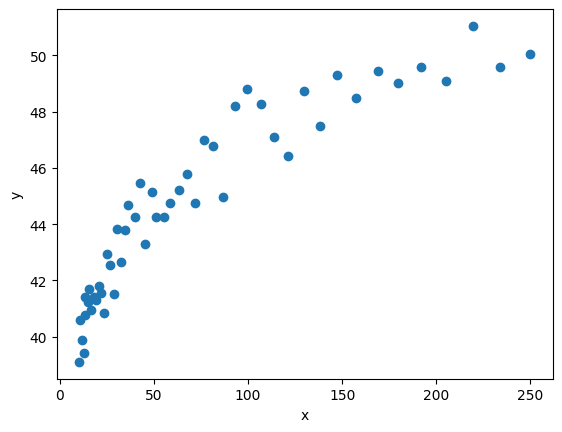

In [4]:
# Plot original data points
plt.scatter(x_data, y_data)
plt.xlabel('x')
plt.ylabel('y')

## Step 2: Coordinate transformation 

In [5]:
# Transform the x variable
log_x = np.log(x_data)

## Step 3: Model fitting

In [6]:
# Fit the curve
coefs = np.polyfit(log_x, y_data, deg=1)
# Generate a hundred data points
y_fit = np.polyval(coefs, log_x)
# Transform back the x variable
x_fit = np.exp(log_x)

## Step 4: Plot of fitted curve and input data

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


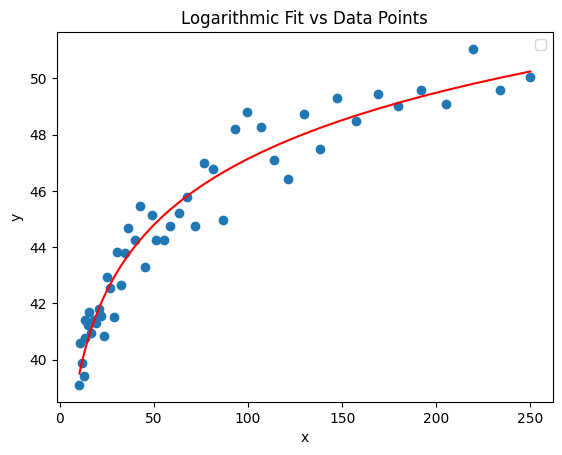

In [7]:
# Plot original data points and fitted curve
plt.scatter(x_data, y_data)
plt.plot(x_fit, y_fit,'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Logarithmic Fit vs Data Points')
plt.legend()
plt.show()

## Step 5: Compute the RSS and R^2 measures

In [8]:
# Define the Rrsidual Sum of Squares (RSS) function
def rss(y, y_pred):
    return np.sum((y - y_pred) ** 2)
# Define R^2 function
def r_squared(y, y_pred):
    return 1 - rss(y, y_pred) / rss(y, np.mean(y))

In [9]:
print(f'The RSS of fitted model is : {rss(y_data, y_fit):.2f}')
print(f'The R^2 of fitted model is : {r_squared(y_data, y_fit):.2f}')

The RSS of fitted model is : 31.84
The R^2 of fitted model is : 0.94


__Comments__:
- The RSS measures the errors of the fitted model with respect to the actual data. In this case, an RSS value of 31.84 suggests that the model's predictions are relatively close to the data points, as is observed in the above plot

- The R^2 represents how the model performs compared to the mean baseline model. A value of 0.94, which is close to 1, indicates that our model performs much better than the simple mean model.

# Task 2

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

## Step 1: Load data and create test/train sets

In [11]:
# load data 
data = pd.read_csv('p3_task-2.csv')
X = data[['x1', 'x2', 'x3']].values  # assuming the feature column is labeled 'x'
y = data['y'].values  # assuming the target column is labeled 'y'

# train/test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 2: Plot the training data to get a quick overview

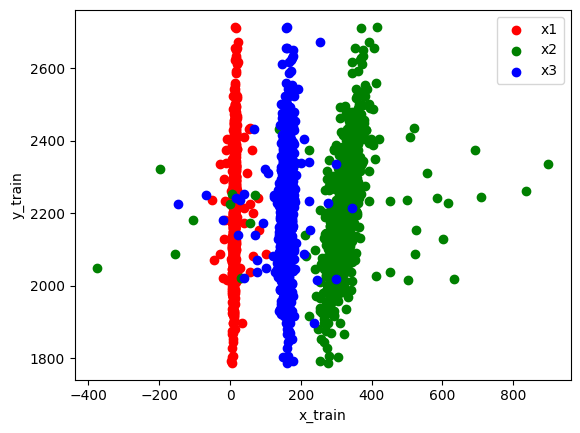

In [12]:
# Scatter plot for x1 vs y
for i,c in zip(range(3),['r','g','b']):
    plt.scatter(X_train[:, i], y_train,label=f'x{i+1}',color=c)
    plt.ylabel('y_train')
    plt.xlabel('x_train')

plt.legend()


## Step 3: Build and apply a cleaning strategy to remove outliers from the training data.

We use the interquartile range (IQR) to identify outlier candidates on each feature 'x1', 'x2' and 'x3'.

In [13]:
# convert X_train to a DF for easier manipulation
X_train_df = pd.DataFrame(X_train, columns=['x1', 'x2', 'x3'])

# Calculate 25% percentile and 75% percentile
Q1 = np.percentile(X_train_df, 25, axis=0)
Q3 = np.percentile(X_train_df, 75, axis=0)

# Calculate the IQR
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply IQR to remove entries where at least one value is considered an outliers 
iqr_filter = ((X_train_df >= lower_bound) & (X_train_df <= upper_bound)).all(axis=1)

# Filter out the training data
X_train_cleaned = X_train_df[iqr_filter].values
y_train_cleaned = y_train[iqr_filter]

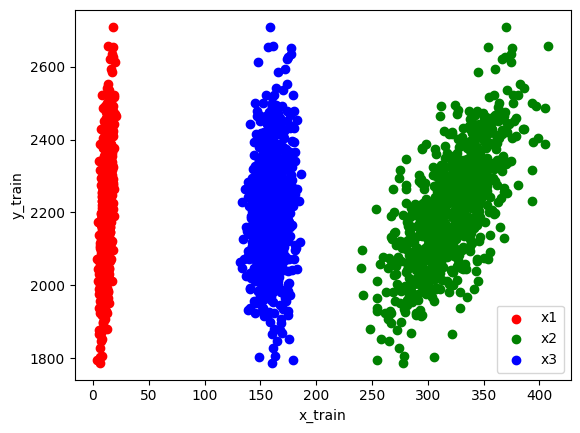

In [14]:
# Scatter plot for x1 vs y
for i,c in zip(range(3),['r','g','b']):
    plt.scatter(X_train_cleaned[:, i], y_train_cleaned,label=f'x{i+1}',color=c)
    plt.ylabel('y_train')
    plt.xlabel('x_train')

plt.legend()

## Step 4: Fit models and compare MAE scores

In [15]:
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.metrics import mean_absolute_error


Train models

In [16]:
# 1. Linear regression with outliers
linear_with_outliers = LinearRegression()
linear_with_outliers.fit(X_train, y_train)
y_pred_linear_with_outliers = linear_with_outliers.predict(X_test)

# 2. Huber regression (robust to outliers)
huber = HuberRegressor()
huber.fit(X_train, y_train)
y_pred_huber = huber.predict(X_test)

# 3. Linear regression without outliers
linear_without_outliers = LinearRegression()
linear_without_outliers.fit(X_train_cleaned, y_train_cleaned)
y_pred_linear_without_outliers = linear_without_outliers.predict(X_test)


In [17]:
mae_linear_with_outliers = mean_absolute_error(y_test, y_pred_linear_with_outliers)
mae_huber = mean_absolute_error(y_test, y_pred_huber)
mae_linear_without_outliers = mean_absolute_error(y_test, y_pred_linear_without_outliers)

In [18]:
print(f'Linear Regression with Outliers: {mae_linear_with_outliers:.2f}')
print(f'Huber Regression: {mae_huber:.2f}')
print(f'Linear Regression without Outliers: {mae_linear_without_outliers:.2f}')

Linear Regression with Outliers: 125.87
Huber Regression: 110.17
Linear Regression without Outliers: 109.44


__Comments__
- Both Huber regression and linear regression without outliers exhibit a similar performance
- And both of these perform better than linear regression with outliers
- This validates that Huber regression is a good approach for handling outliers without removing them from the training set